In [ ]:
! pip install pandas
! pip install scikit-learn

In [ ]:
! pip install numpy

In [34]:
# process: read the data
import pandas as pd

df = pd.read_csv('data/sample_data.csv')

In [ ]:
df.describe(include='all').T

In [ ]:
df.columns.tolist()

In [ ]:
# process: remove unwanted columns
columns = [
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'color',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'Price']

df = df[columns]

In [ ]:
df.info()



In [ ]:
numeric_columns = [
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'Price']

category_columns = [
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'color'
]

In [ ]:
df2 = df[numeric_columns]

df3 = df[category_columns]
df3

df.describe(include='all').T

In [ ]:
df3

In [ ]:
# process: remove high cardinality columns to avoid risk of encoding complexity and overfitting.
df.drop('CarName', axis=1, inplace=True)

In [ ]:
# process: replace numeric NaN's to median()
numeric_feature_columns = [
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

for col in numeric_feature_columns:
    df[col] = df[col].fillna(df[col].median())

category_columns = [
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'color'
]

for col in category_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df[category_columns].info()

In [ ]:
df.isnull().sum()

In [ ]:
df2 = df.copy()
df2.dropna(inplace=True)

df2.shape

In [35]:
! pip install matplotlib
! pip install seaborn

<Axes: >

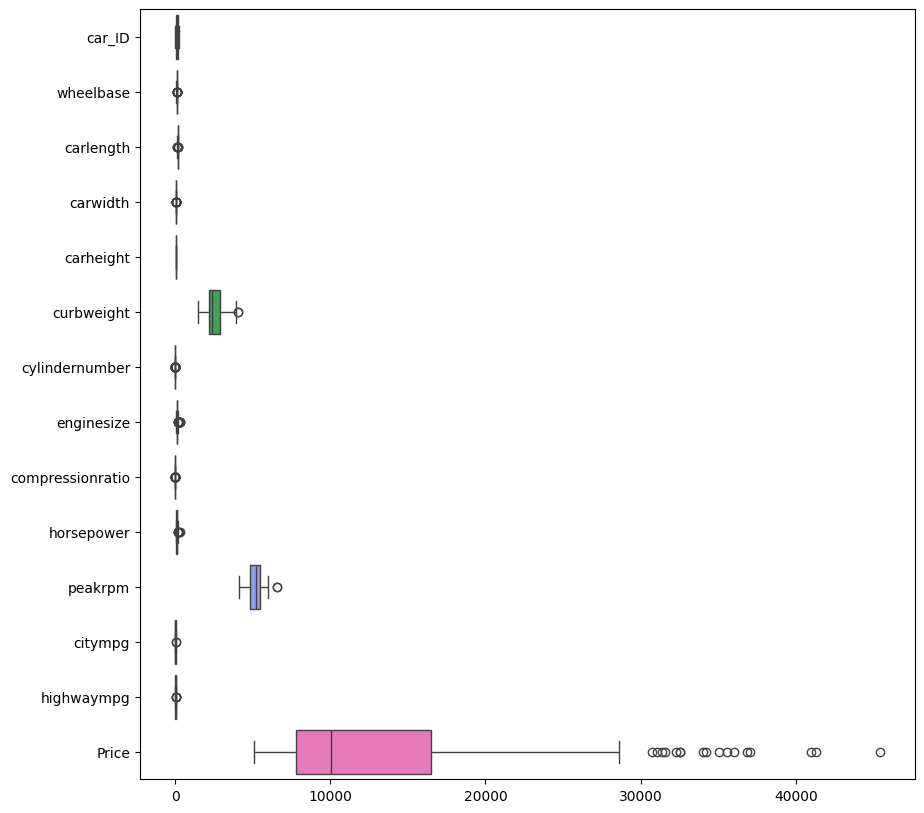

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient='h')

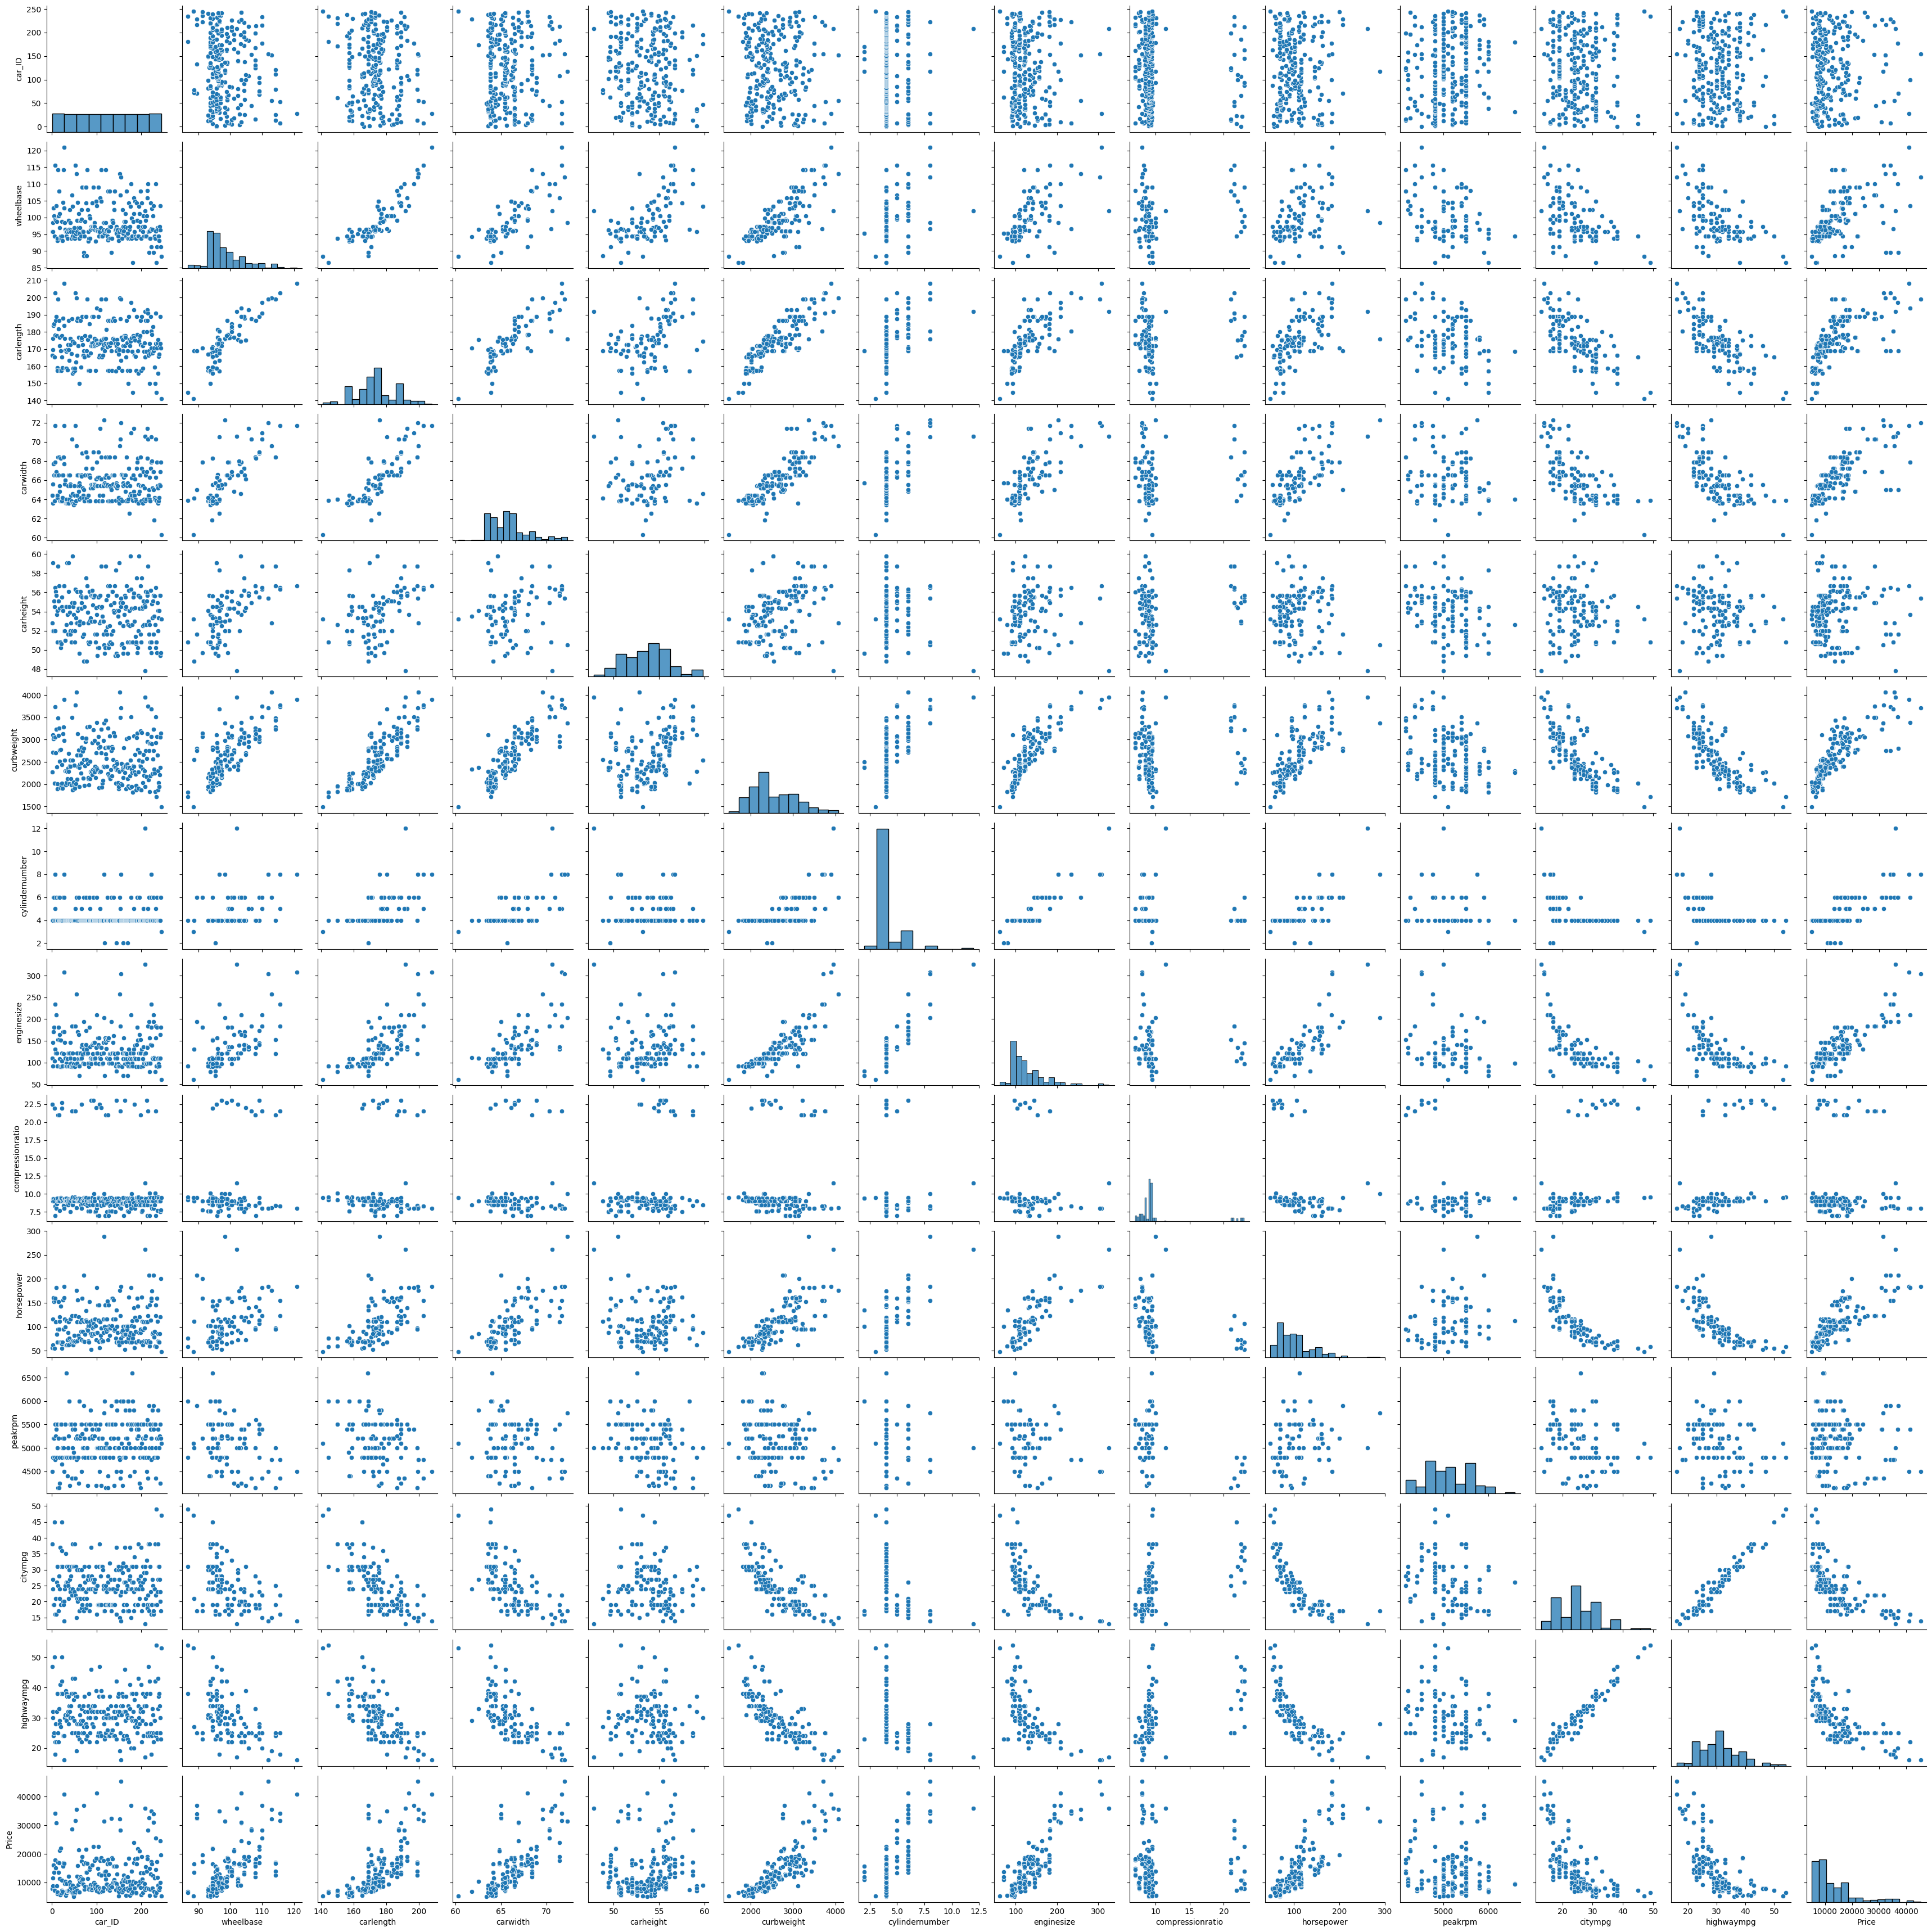

In [37]:
sns.pairplot(data=df)

In [38]:
! pip install scikit-learn

In [ ]:
import pandas as pd

df = pd.read_csv('data/sample_data.csv')

# process: remove unwanted columns
columns = [
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'color',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'Price']

df = df[columns]

# process: remove high cardinality columns to avoid risk of encoding complexity and overfitting.
df.drop('CarName', axis=1, inplace=True)

# process: replace numeric NaN's to median()
numeric_feature_columns = [
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

for col in numeric_feature_columns:
    df[col] = df[col].fillna(df[col].median())

category_columns = [
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'color'
]

for col in category_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

<h2> Training the model </h2>

* numeric imputers to mean when missing values
* object/category imputers ignore when missing values.
* pipelined to random forest algorithm.

In [39]:
# training: imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [45]:
# training: prepare features lists.
features = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'color',
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'cylindernumber',
    'enginesize',
    'compressionratio',
    'horsepower',
    'peakrpm',
    'citympg',
    'highwaympg',
    ]

target = 'Price'

numeric_features = [
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'cylindernumber',
    'enginesize',
    'compressionratio',
    'horsepower',
    'peakrpm',
    'citympg',
    'highwaympg'
    ]

category_features = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'color'
    ]

In [46]:
# training: prepare imputers and pipelines
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer = SimpleImputer(strategy='mean')
preprocessor = ColumnTransformer(transformers=[
    ('cat', Pipeline([
        ('imputer', categorical_imputer),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), category_features),
    ('num', numeric_imputer, numeric_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('regressor', LinearRegression())
    ('RandomForest', RandomForestRegressor(random_state=42))
])

In [ ]:
# training: Train-test split and train

x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [49]:
# training: train the model pipeline
pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('RandomForest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


<h2> Performance Evaluation </h2>

* The model is not performing very well. the Mean Squared Error is significantly high. 
* Mean Squared Error: 4604277.27 is significanly high value.
* apparently the dataset is of large range too

In [50]:
# validation: Predict and evaluate
import numpy as np
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

# Output results
print("Predicted Prices:", y_pred)
print("Mean Squared Error:", mse)

# Error analysis
y_test = np.array(y_test)
y_pred = np.array(y_pred)

diff  = y_test - y_pred
print(f" mean = {diff.mean()} \n max= {diff.max()} \n min = {diff.min()} \n standard deviation = {diff.std()}")

Predicted Prices: [17228.82    34630.925    7348.35    18981.67167  5723.79    10043.25
  8956.34    13992.19    37289.595    8171.135    7046.735   11685.26
 11435.04    10201.61     6996.105    7948.175   17206.32835 14087.69
 16052.23336  7701.265    7538.7     19109.5     15976.89     6293.37
  8986.21   ]
Mean Squared Error: 4604277.278926648
 mean = 536.3128647999997 
 max= 3957.8099999999995 
 min = -6529.595000000001 
 standard deviation = 2077.6539148704883
